# 목표 : 다중 속성 / 피쳐를 기반으로 수치값 예측
: 이전에는 물고기 feature를 길이 무게만 사용했지만 이제는 4개 전부 사용
- data : fish.csv
- feature : Length, Diagonal, Height, Width
- target : 수치값 Weight
- 학습 유형 : 지도학습 + 회귀
- 알고리즘 : 데이터를 확인 후 결정

## <hr>1. 모듈로딩 및 데이터 준비

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # 3-1에 사용
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 3-2에 사용
# 알고리즘은 데이터 판단 후 나중에 import 

In [125]:
# 데이터 준비
file="../data/fish.csv"

# Bream 행만 추출 => 35개 행만 추출
dataDF = pd.read_csv(file, nrows=35, usecols=[1, 2, 3, 4, 5]) # 0번 col은 품종 -> 필요 X

In [126]:
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


## <hr>2. 데이터 확인(결측치 생략)
: 4개의 feature와 weight가 어떤 관계가 있는지 알 수 없음 => 상관계수, 시각화


In [127]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
# 행수, 열수, target, feature list, 상관계수 값
# return : 없음
# x = target
# y = feature

def print_feature(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1) # matplot lib는 1부터 시작해서 +1
        plt.scatter(df[target], df[features[idx]], label=f"corr:{corrs[idx]:.2}")
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout()
    plt.show()

In [128]:
dataDF.columns

Index(['Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [129]:
dataDF.columns[1:] # feature만 뽑음

Index(['Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [29]:
corrList = dataDF.corr()["Weight"].to_list()
corrList # 1.0은 자기 자신과의 상관관계이니까 필요 X

[1.0,
 0.9462561265460506,
 0.947135878863793,
 0.9645275374662504,
 0.9253033105453]

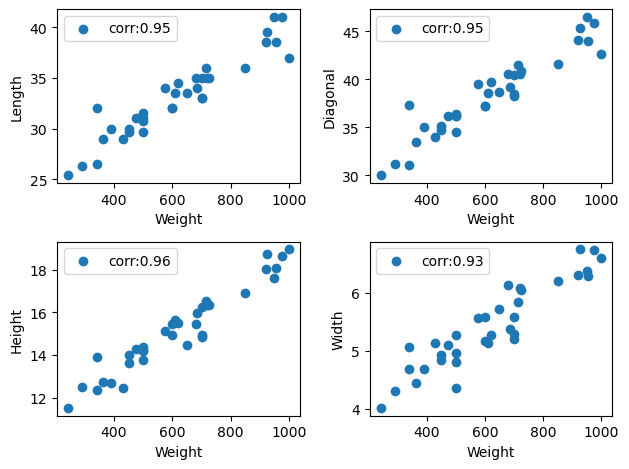

In [31]:
#          nrows|ncols| df |     target      |     features       |  corrs
print_feature(2, 2, dataDF, dataDF.columns[0], dataDF.columns[1:], corrList[1:])

## <hr>3. 학습 준비
- 학습 알고리즘 : 양의 선형 상관관계로 파악됨 -> 선형 모델
- 학습 데이터 준비 : feature, target -> train, test로 분리
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => __피쳐 스케일링__

### 3-1. 학습 데이터 분리 => 피쳐-타겟, 학습용 데이터셋 - 테스트용 데이터셋

In [34]:
# 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
featureDF.head(2)

,Length,Diagonal,Height,Width
0,25.4,30.0,11.52,4.0200
1,26.3,31.2,12.48,4.3056


In [35]:
targetDF = dataDF[dataDF.columns[0]]
targetDF.head(2)

0    242
1    290
Name: Weight, dtype: int64

In [88]:
# 데이터셋 준비
X_train, X_test, y_train, y_test = train_test_split(featureDF, 
                                                    targetDF, 
                                                    random_state=7, 
                                                    test_size=0.3) # train_size = 1 - 0.3 = 0.7 -> 하나만 적어주면 나머지는 알잘딱
# 회귀라서 분류처럼 비율을 맞춰줄 필요 X

In [89]:
# 뒤에가서 삐꾸내지 말고 앞에서 차원 확인하고 가기
print(f"[훈련용] X_train : {X_train.shape}, y_train : {y_train.shape}")
print(f"[테스트용] X_test : {X_test.shape}, y_test : {y_test.shape}")

[훈련용] X_train : (24, 4), y_train : (24,)
[테스트용] X_test : (11, 4), y_test : (11,)


### 3-2. feature scaling => 훈련데이터로 생성

In [90]:
# 평균 0 편차 1
std_scaler = StandardScaler()
std_scaler.fit(X_train)

StandardScaler()

In [91]:
# 최소 0 최대 1
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)

MinMaxScaler()

In [92]:
# 중앙값
rb_scaler = RobustScaler()
rb_scaler.fit(X_train)

RobustScaler()

In [93]:
# 3가지 버전에 스케일된 데이터셋 준비 -> scaler들을 리스트에 담아서 사용해도 됩니당!!
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

X_train_rb = rb_scaler.transform(X_train)
X_test_rb = rb_scaler.transform(X_test)

## <hr>4. 학습 진행

In [94]:
from sklearn.linear_model import LinearRegression

In [95]:
model = LinearRegression()
model.fit(X_train_std, y_train)

print(f"[모델파라미터] \n coef_ : {model.coef_}\n intercept_ : {model.intercept_}") # 하이퍼랑 다른 거임 
# 선형 회귀는 KNN과 달리 그래프를 그릴 수 있음 -> 기울기(feature 개수만큼)와 절편이 중요

[모델파라미터] 
 coef_ : [  5.81124146  56.71151617 108.02781251  28.46942271]
 intercept_ : 633.9583333333335


$y = x_0*coef[0] + x_1*coef[1] + x_2*coef[2] + x_3*coef[3] + intercept$

## <hr>5. 모델 평가
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
    - 훈련 점수 $ \gg $ 테스트 점수 -> 과대적합
    - 훈련 점수 $\downarrow $ 테스트 점수 $\downarrow $ -> 과소적합
    - 훈련 점수 $\cong $ 테스트 점수 -> 최적적합 

In [96]:
X_test_std.shape, y_test.shape

((11, 4), (11,))

In [103]:
def print_score(model, scaler, train_x, test_x, train_y, test_y ):
    scaled_train_x = scaler.transform(train_x)
    model.fit(scaled_train_x, train_y)
    score1 = model.score(scaled_train_x, train_y)

    
    scaled_test_x = scaler.transform(test_x)
    score2 = model.score(scaled_test_x, test_y)
    
    print(f"Train Score = {score1} --- Test Score : {score2}")

In [118]:
model.fit(X_train_std, y_train)
train_score = model.score(X_train_std, y_train)
test_score = model.score(X_test_std, y_test)

print(f"Train Score : {train_score} --- Test Score : {test_score}")
print_score(model, std_scaler, X_train, X_test, y_train, y_test) # 함수 호출

Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000151
Train Score = 0.9546390373777777 --- Test Score : 0.9064944670000151


In [119]:
model.fit(X_train_mm, y_train)
train_score = model.score(X_train_mm, y_train)
test_score = model.score(X_test_mm, y_test)

print(f"Train Score : {train_score} --- Test Score : {test_score}")
print_score(model, mm_scaler, X_train, X_test, y_train, y_test) # 함수 호출 

Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000149
Train Score = 0.9546390373777777 --- Test Score : 0.9064944670000149


In [120]:
model.fit(X_train_rb, y_train)
train_score = model.score(X_train_rb, y_train)
test_score = model.score(X_test_rb, y_test)

print(f"Train Score : {train_score} --- Test Score : {test_score}")
print_score(model, rb_scaler, X_train, X_test, y_train, y_test) # 함수 호출 

Train Score : 0.9546390373777777 --- Test Score : 0.9064944670000151
Train Score = 0.9546390373777777 --- Test Score : 0.9064944670000151


In [121]:
preds = model.predict(X_test)

C:\Users\kdp\anaconda3\envs\EXAM_ML\lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [122]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, preds, squared=False)

4994.814710819703

In [101]:
def print_feature2(nrows, ncols, df, target, features, corrs):
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1) # matplot lib는 1부터 시작해서 +1
        plt.hist(df[features[idx]], label=f"corr:{corrs[idx]:.2}")
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.legend()
    plt.tight_layout()
    plt.show()

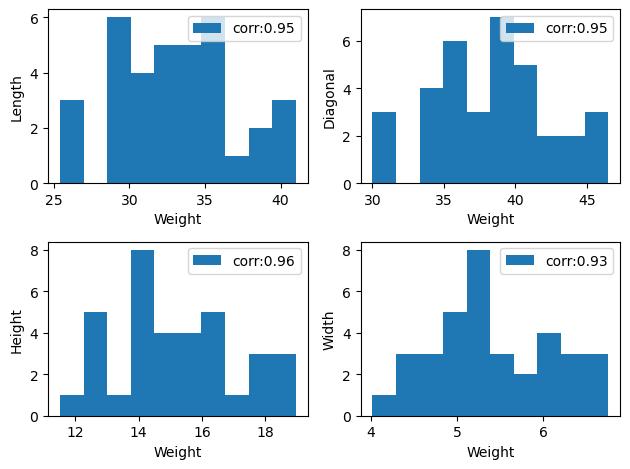

In [102]:
print_feature2(2, 2, dataDF, dataDF.columns[0], dataDF.columns[1:], corrList[1:])

In [ ]:
# 강사님 ver 
# score_dict = {"std" : [], "mm" : [], "rb" : []}
# scoreDF = pd.DataFrame(score_dict, index = ["model", "train", "test"])

In [123]:
a = 5